In [ ]:
from scipy import stats
import pandas as pd
import seaborn as sb
import numpy as np
#import scikit_posthocs as sp
from scipy.stats import tukey_hsd

In [7]:
# HOT / COLD LOG10 + ANOWA dla EPS

In [2]:
wyniki = pd.read_csv('do_statystyki.csv', sep='\t', parse_dates=True)

In [3]:
wyniki[wyniki == 0] = np.nan

In [4]:
#grupa_HOT = wyniki.loc[(wyniki['Data'] == '8-06-2021') \
#                        | (wyniki['Data'] == '21-07-2021') \
 #                       | (wyniki['Data'] == '4-10-2021') \
  #                      | (wyniki['Data'] == '00-05-2022')     
   #                    ]

#grupa_COLD = wyniki.loc[(wyniki['Data'] == '13-12-2021') \
    #                   | (wyniki['Data'] == '00-02-2022') \
     #                  | (wyniki['Data'] == '00-03-2022')                       
      #                 ]
    
    
    
    
zima = wyniki.loc[(wyniki['Data'] == '13-12-2021') \
                  | (wyniki['Data'] == '00-02-2022')]

wiosna = wyniki.loc[(wyniki['Data'] == '00-03-2022') \
                    | (wyniki['Data'] == '00-05-2022')]

lato = wyniki.loc[(wyniki['Data'] == '8-06-2021') \
                 | (wyniki['Data'] == '21-07-2021')]

jesien = wyniki.loc[(wyniki['Data'] == '4-10-2021')]

In [6]:
zima

,reaktor,Data,Sucha masa [g/L],temp,SOL B,SOL C,SOL TOC,SOL DOC,SOL POC,LB B,LB C,LB TOC,LB DOC,LB POC,TB B,TB C,TB TOC,TB DOC,TB POC
10,R2,13-12-2021,4.0,16.671962,NaN,NaN,2.437500,2.317500,0.120000,9.500000,6.697115,0.255000,0.105000,0.150000,48.250000,9.293269,9.000000,8.110000,0.890000
11,R3,13-12-2021,3.7,16.671962,10.000000,NaN,3.037838,2.743243,0.294595,8.918919,7.188150,0.851351,0.413514,0.437838,35.405405,11.554054,6.959459,6.248649,0.710811
12,R4,13-12-2021,3.9,16.671962,6.153846,NaN,3.179487,2.956410,0.223077,10.256410,6.178501,0.687179,0.641026,0.046154,37.179487,8.841223,3.146154,2.825641,0.320513
13,R1,00-02-2022,3.6,14.597627,8.888889,0.870726,4.286111,4.247222,0.038889,5.277778,7.174145,0.541667,0.044444,0.497222,11.388889,8.563034,0.805556,0.805556,NaN
14,R2,00-02-2022,3.7,14.597627,11.081081,1.262994,3.864865,3.054054,0.810811,4.594595,6.876299,0.351351,0.027027,0.324324,12.162162,9.371102,0.621622,0.216216,0.405405
15,R3,00-02-2022,3.3,14.597627,11.515152,1.299534,4.633333,4.069697,0.563636,2.424242,8.175991,0.648485,0.078788,0.569697,10.000000,10.448718,1.081818,0.978788,0.103030


In [ ]:
badana = 'TB B'

#grupa_HOT_log = np.log10(grupa_HOT[badana])
#grupa_COLD_log = np.log10(grupa_COLD[badana])

zima_log = np.log10(zima[badana])
wiosna_log = np.log10(wiosna[badana])
lato_log = np.log10(lato[badana])
jesien_log = np.log10(jesien[badana])

#data = [data_group1, data_group2, data_group3, data_group4, data_group5, data_group6, data_group7]


# 1. test homogeneity of variances before and after a log transformation, 
# and 2. if the transformation successfully stabilized variances
# carry out a parametric ANOVA, and report results with geometric means. 

# test on log-transformed data:
print(stats.bartlett(zima_log, wiosna_log, lato_log, jesien_log))
# so we can accept variances as homogeneous

F = stats.f_oneway(zima_log, wiosna_log, lato_log, jesien_log)
print(F)

p_values = tukey_hsd(zima_log, wiosna_log)

print(p_values)

#sb.heatmap(p_values, annot=True)

# LOG10 transformed + One way ANOVA dla EPS

In [4]:
wyniki = pd.read_csv('do_statystyki.csv', sep='\t', parse_dates=True)

In [12]:
wyniki[wyniki == 0] = np.nan

In [31]:
gr1 = wyniki.loc[wyniki['Data'] == '8-06-2021']
gr2 = wyniki.loc[wyniki['Data'] == '21-07-2021']
gr3 = wyniki.loc[wyniki['Data'] == '4-10-2021']
gr4 = wyniki.loc[wyniki['Data'] == '13-12-2021']
gr5 = wyniki.loc[wyniki['Data'] == '00-02-2022']
gr6 = wyniki.loc[wyniki['Data'] == '00-03-2022']
gr7 = wyniki.loc[wyniki['Data'] == '00-05-2022']
#gr8 = wyniki.loc[wyniki['Data'] == '00-08-2022']
#gr9 = wyniki.loc[wyniki['Data'] == '31-10-2022']


badana = 'TB POC'

data_group1 = np.log10(gr1[badana])
data_group2 = np.log10(gr2[badana])
data_group3 = np.log10(gr3[badana])
data_group4 = np.log10(gr4[badana])
data_group5 = np.log10(gr5[badana])
data_group6 = np.log10(gr6[badana])
data_group7 = np.log10(gr7[badana])
#data_group8 = gr8[badana]
#data_group9 = gr9[badana]

data = [data_group1, data_group2, data_group3, data_group4, data_group5, data_group6, data_group7]


# 1. test homogeneity of variances before and after a log transformation, 
# and 2. if the transformation successfully stabilized variances
# carry out a parametric ANOVA, and report results with geometric means. 

# test on log-transformed data:
print(stats.bartlett(data_group1, data_group2, data_group3, data_group4, data_group5, data_group6, data_group7))
# so we can accept variances as homogeneous

F = stats.f_oneway(data_group1, data_group2, data_group3, data_group4, data_group5, data_group6, data_group7)
print(F)

p_values = tukey_hsd(data_group1, data_group2, data_group3, data_group4, data_group5, data_group6, data_group7)

print(p_values)

#sb.heatmap(p_values, annot=True)

BartlettResult(statistic=14.85154289303903, pvalue=0.021443342365295985)
F_onewayResult(statistic=nan, pvalue=nan)
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.434       nan       nan       nan
 (0 - 2)      0.720       nan       nan       nan
 (0 - 3)      0.523       nan       nan       nan
 (0 - 4)        nan       nan       nan       nan
 (0 - 5)        nan       nan       nan       nan
 (0 - 6)      0.836       nan       nan       nan
 (1 - 0)     -0.434       nan       nan       nan
 (1 - 2)      0.285       nan       nan       nan
 (1 - 3)      0.089       nan       nan       nan
 (1 - 4)        nan       nan       nan       nan
 (1 - 5)        nan       nan       nan       nan
 (1 - 6)      0.401       nan       nan       nan
 (2 - 0)     -0.720       nan       nan       nan
 (2 - 1)     -0.285       nan       nan       nan
 (2 - 3)     -0.197       nan       nan       nan
 (2 - 4)        n

# Kruskal-wallis + bonferroni dla EPS

In [4]:
wyniki = pd.read_csv('do_statystyki.csv', sep='\t', parse_dates=True)

In [5]:
wyniki.dtypes

reaktor              object
Data                 object
Sucha masa [g/L]    float64
SOL B               float64
SOL C               float64
SOL TOC             float64
SOL DOC             float64
SOL POC             float64
LB B                float64
LB C                float64
LB TOC              float64
LB DOC              float64
LB POC              float64
TB B                float64
TB C                float64
TB TOC              float64
TB DOC              float64
TB POC              float64
dtype: object

In [6]:
gr1 = wyniki.loc[wyniki['Data'] == '8-06-2021']
gr2 = wyniki.loc[wyniki['Data'] == '21-07-2021']
gr3 = wyniki.loc[wyniki['Data'] == '4-10-2021']
gr4 = wyniki.loc[wyniki['Data'] == '13-12-2021']
gr5 = wyniki.loc[wyniki['Data'] == '00-02-2022']
gr6 = wyniki.loc[wyniki['Data'] == '00-03-2022']
gr7 = wyniki.loc[wyniki['Data'] == '00-05-2022']
#gr8 = wyniki.loc[wyniki['Data'] == '00-08-2022']
#gr9 = wyniki.loc[wyniki['Data'] == '31-10-2022']


In [65]:
badana = 'TB DOC'

data_group1 = gr1[badana]
data_group2 = gr2[badana] 
data_group3 = gr3[badana]
data_group4 = gr4[badana]
data_group5 = gr5[badana]
data_group6 = gr6[badana]
data_group7 = gr7[badana]
#data_group8 = gr8[badana]
#data_group9 = gr9[badana]

data = [data_group1, data_group2, data_group3, data_group4, data_group5, data_group6, data_group7]


In [66]:
result = stats.kruskal(data_group1, data_group2, data_group3, data_group4, data_group5, data_group6, data_group7)
print(result)

KruskalResult(statistic=17.007905138339922, pvalue=0.009254235651691804)


In [25]:
import scikit_posthocs as sp

In [67]:
p_values = sp.posthoc_dunn(data, p_adjust = 'bonferroni')

In [68]:
print(p_values)

          1    2         3         4         5         6         7
1  1.000000  1.0  1.000000  1.000000  1.000000  0.847830  0.995412
2  1.000000  1.0  1.000000  1.000000  1.000000  1.000000  1.000000
3  1.000000  1.0  1.000000  1.000000  0.173837  0.065689  0.080389
4  1.000000  1.0  1.000000  1.000000  1.000000  0.583303  0.683599
5  1.000000  1.0  0.173837  1.000000  1.000000  1.000000  1.000000
6  0.847830  1.0  0.065689  0.583303  1.000000  1.000000  1.000000
7  0.995412  1.0  0.080389  0.683599  1.000000  1.000000  1.000000


<AxesSubplot:>

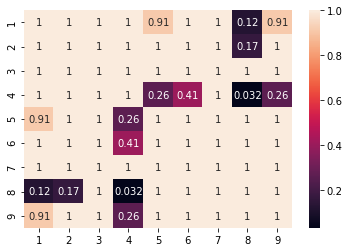

In [169]:
sb.heatmap(p_values, annot=True)

# zabawy korelacją

In [39]:
corr_matrix = wyniki.loc[:,bialka].corr()
print(corr_matrix)

          SOL B      LB B      TB B
SOL B  1.000000 -0.553767  0.389684
LB B  -0.553767  1.000000 -0.009794
TB B   0.389684 -0.009794  1.000000


In [40]:
cukry = ['SOL C', 'LB C', 'TB C']

In [41]:
corr_matrix = wyniki.loc[:,cukry].corr()
print(corr_matrix)

          SOL C      LB C      TB C
SOL C  1.000000 -0.271679 -0.243378
LB C  -0.271679  1.000000  0.555731
TB C  -0.243378  0.555731  1.000000


In [170]:
bialka_cukry_toc_doc_poc = ['SOL B', 'LB B', 'TB B', 'SOL C', 'LB C', 'TB C', 'SOL TOC', 'LB TOC', 'TB TOC', 'SOL DOC', 'LB DOC', 'TB DOC', 'SOL POC', 'LB POC', 'TB POC']

In [171]:
corr_matrix = wyniki.loc[:,bialka_cukry_toc_doc_poc].corr()
print(corr_matrix)

            SOL B      LB B      TB B     SOL C      LB C      TB C   SOL TOC  \
SOL B    1.000000 -0.553767  0.389684  0.600777 -0.352073 -0.430874  0.297267   
LB B    -0.553767  1.000000 -0.009794 -0.442044  0.210223  0.037121  0.017506   
TB B     0.389684 -0.009794  1.000000  0.235114 -0.637998 -0.336961 -0.031637   
SOL C    0.600777 -0.442044  0.235114  1.000000 -0.271679 -0.243378  0.190371   
LB C    -0.352073  0.210223 -0.637998 -0.271679  1.000000  0.555731 -0.169826   
TB C    -0.430874  0.037121 -0.336961 -0.243378  0.555731  1.000000 -0.266336   
SOL TOC  0.297267  0.017506 -0.031637  0.190371 -0.169826 -0.266336  1.000000   
LB TOC   0.033834  0.160489  0.454364  0.243761 -0.427634 -0.460401  0.100391   
TB TOC   0.145876 -0.061131  0.740238  0.159551 -0.567190 -0.317007  0.041427   
SOL DOC  0.358143 -0.020491 -0.001765  0.259976 -0.217112 -0.209519  0.960101   
LB DOC   0.043749  0.207098  0.509731  0.220070 -0.417686 -0.504578 -0.028614   
TB DOC   0.094504 -0.044244 

<AxesSubplot:>

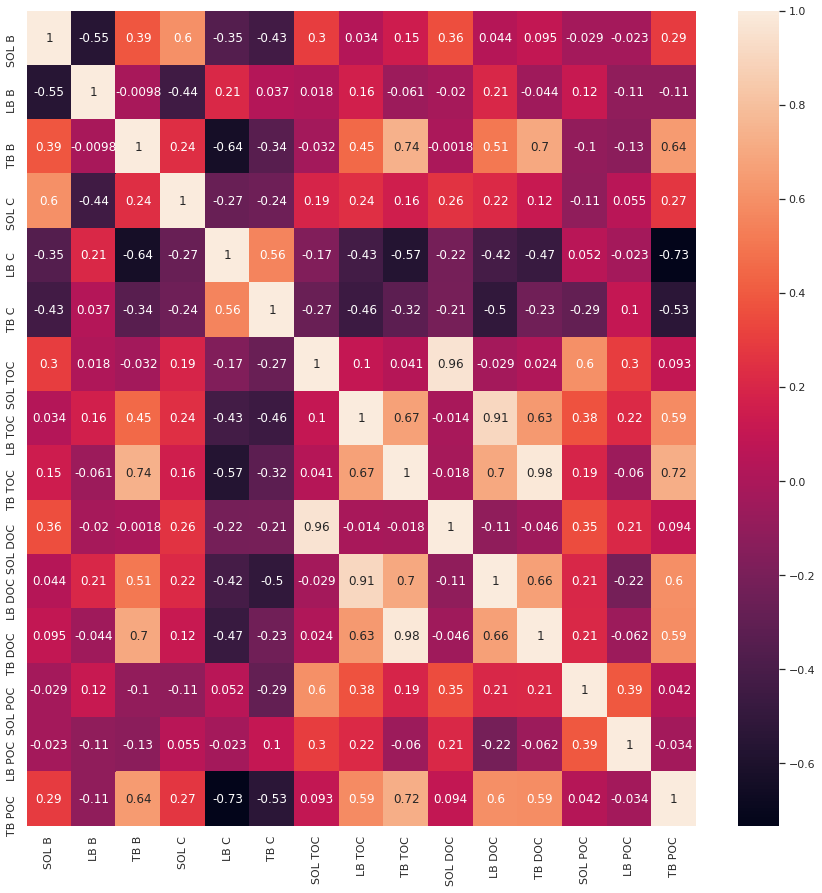

In [174]:
sb.set(rc = {'figure.figsize':(15, 15)})

sb.heatmap(corr_matrix, annot=True)

# PCA EPS

In [61]:
dane_do_pca = pd.read_csv('do_statystyki.csv', sep='\t', parse_dates=True)

In [62]:
dane_do_pca

,reaktor,Data,Sucha masa [g/L],temp,SOL B,SOL C,SOL TOC,SOL DOC,SOL POC,LB B,LB C,LB TOC,LB DOC,LB POC,TB B,TB C,TB TOC,TB DOC,TB POC
0,R1,8-06-2021,3.5,20.421759,7.428571,0.000000,4.143714,3.739571,0.404143,6.000000,2.488571,0.789714,0.770486,0.019229,30.285714,4.411429,7.909314,5.988229,1.921086
1,R2,8-06-2021,2.9,20.421759,9.655172,0.551724,5.542138,4.989931,0.552207,11.379310,2.406897,0.936655,0.782241,0.154414,33.448276,1.941379,7.770655,4.630966,3.139690
2,R3,8-06-2021,3.1,20.421759,10.000000,0.000000,5.860774,4.482129,1.378645,7.419355,1.196774,1.386000,0.827129,0.558871,34.838710,2.809677,7.936129,6.013065,1.923065
3,R4,8-06-2021,3.6,20.421759,9.444444,0.000000,4.416028,3.922528,0.493500,7.777778,2.258333,0.920417,0.893917,0.026500,32.500000,5.572222,6.250389,4.981806,1.268583
4,R1,21-07-2021,3.0,22.132562,0.000000,0.000000,0.000000,0.000000,0.000000,7.666667,7.711538,1.189633,1.124800,0.064833,26.666667,8.160000,4.647033,2.591100,2.055933
5,R2,21-07-2021,2.8,22.132562,10.357143,3.179945,4.646607,3.995429,0.651179,6.785714,7.026099,1.144429,0.937429,0.207000,25.357143,5.583791,4.576143,2.533714,2.042429
6,R3,21-07-2021,3.4,22.132562,7.352941,2.505656,3.978647,3.552794,0.425853,10.000000,6.408371,1.450471,1.411529,0.038941,28.529412,7.143665,8.691176,8.602118,0.089059
7,R2,4-10-2021,4.7,21.654012,0.000000,0.000000,0.000000,0.000000,0.000000,6.382979,6.067921,0.954617,0.828702,0.125915,27.021277,6.763502,8.802596,7.729362,1.073234
8,R3,4-10-2021,3.3,21.654012,10.606061,0.000000,5.327788,3.921697,1.406091,6.363636,9.283217,1.002364,0.860758,0.141606,29.393939,8.001166,16.017970,14.199758,1.818212
9,R4,4-10-2021,3.4,21.654012,5.882353,0.000000,4.169853,3.188706,0.981147,7.352941,8.557692,1.038324,0.944500,0.093824,22.352941,7.143665,8.353176,8.326471,0.026706


In [5]:
from sklearn.preprocessing import StandardScaler

In [66]:
# Separating out the features

features = ['temp','SOL B', 'LB B', 'TB B', 'SOL C', 'LB C', 'TB C', 'SOL TOC', 'LB TOC', 'TB TOC', 'SOL DOC', 'LB DOC', 'TB DOC', 'SOL POC', 'LB POC', 'TB POC']

x = dane_do_pca.loc[:, features].values# Separating out the target
y = dane_do_pca.loc[:,['Data']].values# Standardizing the features
x = StandardScaler().fit_transform(x)

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [68]:
finalDf = pd.concat([principalDf, dane_do_pca[['Data']]], axis = 1)

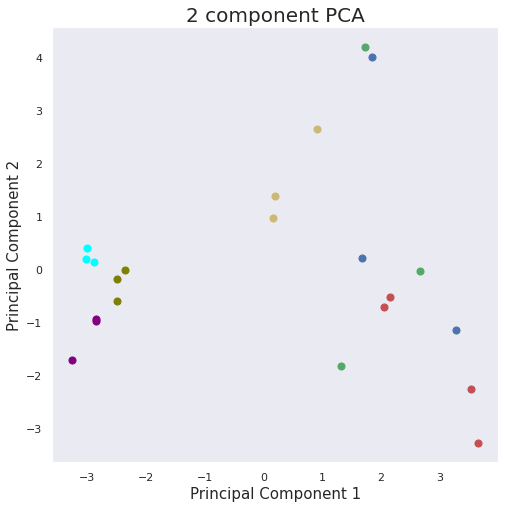

In [69]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['8-06-2021', '21-07-2021', '4-10-2021', '13-12-2021', '00-02-2022', '00-03-2022', '00-05-2022', '00-08-2022', '31-10-2022']
colors = ['r', 'g', 'b', 'y', 'purple', 'aqua', 'olive', 'salmon', 'yellowgreen']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Data'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
#ax.legend(targets)
ax.grid()

# Statystyka alginian

In [83]:
wyniki_alginian = pd.read_csv('alginian_statystyka.csv', sep='\t', parse_dates=True)

In [84]:
wyniki_alginian.fillna(value=0, inplace=True)

In [85]:
data_group1 = wyniki_alginian['1']
data_group2 = wyniki_alginian['2']
data_group3 = wyniki_alginian['3']
data_group4 = wyniki_alginian['4']
data_group5 = wyniki_alginian['5']
data_group6 = wyniki_alginian['6']
data_group7 = wyniki_alginian['7']

In [86]:
result = stats.kruskal(data_group1, data_group2, data_group3, data_group4, data_group5, data_group6, data_group7)
print(result)

KruskalResult(statistic=12.073806308095698, pvalue=0.060342385759152205)


In [87]:
data_group1

0     56.85
1     56.00
2     70.15
3      0.00
4      0.00
5      0.00
6      0.00
7      0.00
8      0.00
9      0.00
10     0.00
11     0.00
Name: 1, dtype: float64

# PCA dla danych technologicznych 

In [107]:
pca_technologia = pd.read_csv('technologia_do_statystyki.csv', sep='\t', parse_dates=True)

In [109]:
# Separating out the features

features = ['weight', 'age', 'svi', 'x']

x = pca_technologia.loc[:, features].values# Separating out the target
y = pca_technologia.loc[:,['Date']].values# Standardizing the features
x = StandardScaler().fit_transform(x)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])


In [111]:
finalDf = pd.concat([principalDf, pca_technologia[['Date']]], axis = 1)

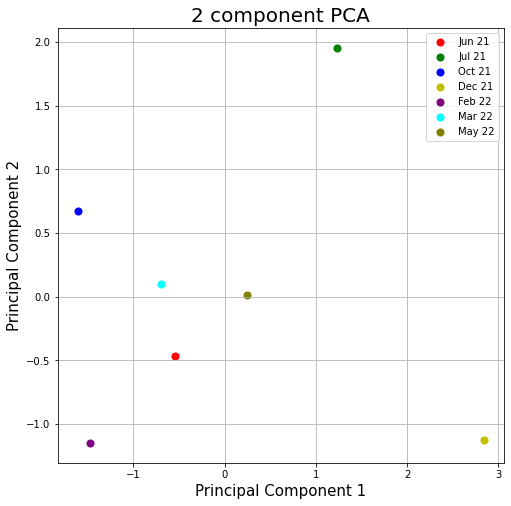

In [116]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Jun 21', 'Jul 21', 'Oct 21', 'Dec 21', 'Feb 22', 'Mar 22', 'May 22']
colors = ['r', 'g', 'b', 'y', 'purple', 'aqua', 'olive']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Date'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### podsumowanie PCA dla danych technologicznych

raczej nic ciekawego tu nie widać, dane, oprócz DEC (400 = nie opada) i JUL (niższa masa)
są do siebie raczej podobne.

Czy dołączyć do tego wyniki EPS? Wydaje mi się, że lepiej to będzie wyglądało i miało większy sens,
jak spróbuję to przedstawić za pomocą korelacji.


# PCA dla danych tech (weight,age,SVI,X) + EPS (średnie z reaktorów)

In [2]:
pca_technologia = pd.read_csv('technologia_do_statystyki.csv', sep='\t', parse_dates=True)

Date        object
weight     float64
age        float64
svi        float64
x          float64
SOL PN     float64
SOL PS     float64
SOL TOC    float64
SOL DOC    float64
SOL POC    float64
LB PN      float64
LB PS      float64
LB TOC     float64
LB DOC     float64
LB POC     float64
TB PN      float64
TB PS      float64
TB TOC     float64
TB DOC     float64
TB POC     float64
dtype: object

In [6]:
# Separating out the features

features = ['weight', 'age', 'svi', 'x', 'temp', 'CHZT', 'BZT5', 'Zog', 'N', 'NH4', 'P', 'SOL PN', 'LB PN', 'TB PN', 'SOL PS', 'LB PS', 'TB PS', 'SOL TOC', 'LB TOC', 'TB TOC', 'SOL DOC', 'LB DOC', 'TB DOC', 'SOL POC', 'LB POC', 'TB POC']

#CHZT	BZT5	Zog	N	NH4	P


x = pca_technologia.loc[:, features].values# Separating out the target
y = pca_technologia.loc[:,['Date']].values# Standardizing the features
x = StandardScaler().fit_transform(x)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])


In [8]:
finalDf = pd.concat([principalDf, pca_technologia[['Date']]], axis = 1)

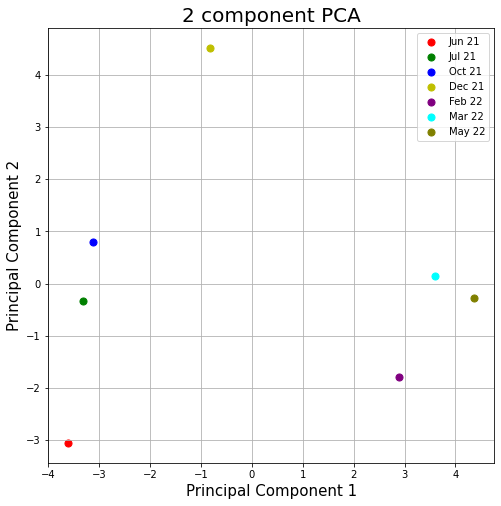

In [9]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Jun 21', 'Jul 21', 'Oct 21', 'Dec 21', 'Feb 22', 'Mar 22', 'May 22']
colors = ['r', 'g', 'b', 'y', 'purple', 'aqua', 'olive']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Date'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### podsumowanie dane tech. + dane EPS
po połączeniu danych tech. z eps, ponownie uzyskujemy rozdział na lata: 21 w jednym kącie i 22 w drugim.
Ma na to zapewne wpływ danych z eps, ponieważ jest ich znacznie więcej i zaburzają wynik (albo też potwierdzają wynik z samych eps: DEC odstaje ponieważ nie opada (400), a JUN odstaje ponieważ niższa masa. I to ma wpływ na to, co obserwujemy na danych z samych eps -> to technologia wpływa na dane EPS)

# korelacja dla danych technologicznych (weight, age, SVI, X) z EPS

EPS = średnie 
(ponieważ dane technologiczne to również średnie)

In [54]:
#features = ['weight', 'age', 'svi', 'x', 'temp', 'SOL PN', 'LB PN', 'TB PN', 'SOL PS', 'LB PS', 'TB PS', 'SOL TOC', 'LB TOC', 'TB TOC', 'SOL DOC', 'LB DOC', 'TB DOC', 'SOL POC', 'LB POC', 'TB POC']
features = ['weight', 'age', 'svi', 'x', 'temp', 'CHZT', 'BZT5', 'Zog', 'N', 'NH4', 'P', 'SOL PN', 'LB PN', 'TB PN', 'SOL PS', 'LB PS', 'TB PS', 'SOL TOC', 'LB TOC', 'TB TOC', 'SOL DOC', 'LB DOC', 'TB DOC', 'SOL POC', 'LB POC', 'TB POC']

In [55]:
corr_matrix = pca_technologia.loc[:,features].corr()
print(corr_matrix)

           weight       age       svi         x      temp      CHZT      BZT5  \
weight   1.000000 -0.362962  0.307399 -0.192479 -0.389841  0.079070  0.313164   
age     -0.362962  1.000000  0.350335  0.248826  0.437491 -0.400737 -0.211779   
svi      0.307399  0.350335  1.000000  0.261984 -0.044260 -0.513914 -0.220945   
x       -0.192479  0.248826  0.261984  1.000000 -0.610518 -0.251130  0.318491   
temp    -0.389841  0.437491 -0.044260 -0.610518  1.000000 -0.090513 -0.556522   
CHZT     0.079070 -0.400737 -0.513914 -0.251130 -0.090513  1.000000  0.752481   
BZT5     0.313164 -0.211779 -0.220945  0.318491 -0.556522  0.752481  1.000000   
Zog      0.100076 -0.260488 -0.081793  0.638830 -0.808797  0.499496  0.845124   
N        0.393602 -0.740722 -0.646494 -0.472166 -0.319159  0.509279  0.297435   
NH4      0.262212  0.419698  0.159395  0.299591 -0.356466 -0.433214  0.017980   
P        0.063901  0.167162  0.075440  0.615141 -0.335003  0.410224  0.786198   
SOL PN   0.273099 -0.867760 

<AxesSubplot:>

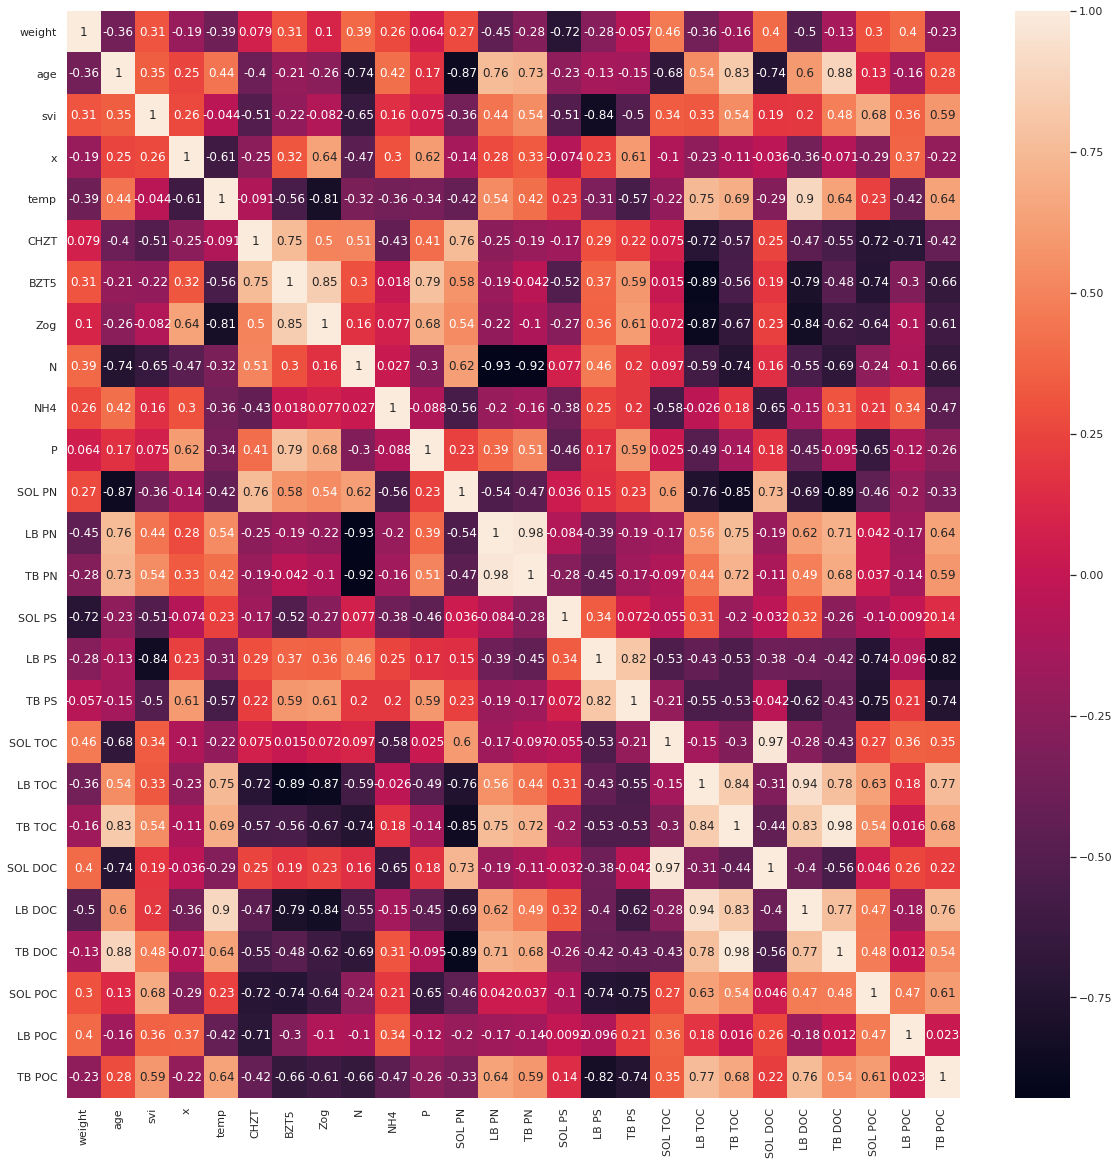

In [56]:
sb.set(rc = {'figure.figsize':(20, 20)})

sb.heatmap(corr_matrix, annot=True)

<AxesSubplot:>

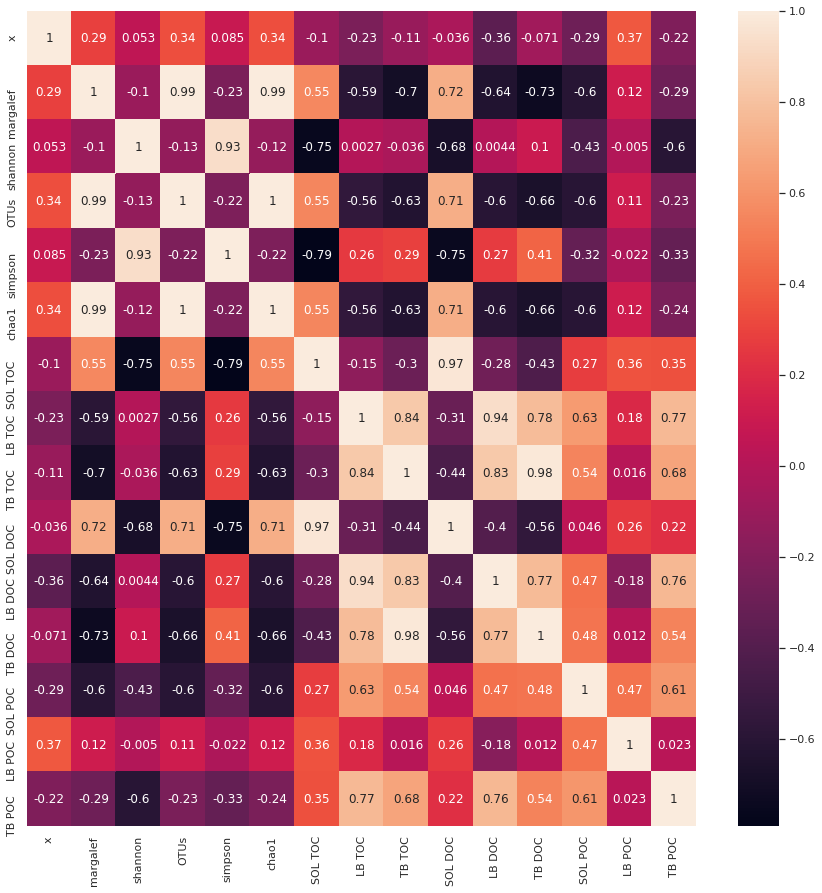

In [73]:

features = ['x', 'margalef', 'shannon', 'OTUs', 'simpson', 'chao1', 'SOL TOC', 'LB TOC', 'TB TOC', 'SOL DOC', 'LB DOC', 'TB DOC', 'SOL POC', 'LB POC', 'TB POC']
corr_matrix = pca_technologia.loc[:,features].corr()

sb.set(rc = {'figure.figsize':(15, 15)})

sb.heatmap(corr_matrix, annot=True)


# PCA dla danych tech (weight,age,SVI,X, oczyszczone) + EPS (średnie z reaktorów)

In [2]:
pca_technologia = pd.read_csv('technologia_do_statystyki.csv', sep='\t', parse_dates=True)

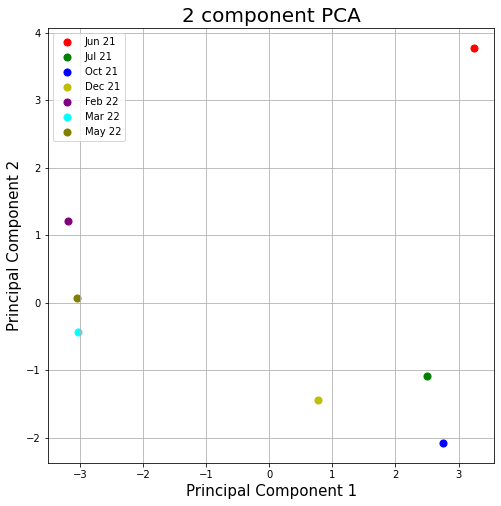

In [10]:
# Separating out the features
from sklearn.preprocessing import StandardScaler
features = ['temp', 'SOL PN', 'LB PN', 'TB PN', 'SOL PS', 'LB PS', 'TB PS', 'SOL TOC', 'LB TOC', 'TB TOC', 'SOL DOC', 'LB DOC', 'TB DOC', 'SOL POC', 'LB POC', 'TB POC']
#features = ['weight', 'age', 'svi', 'x', 'temp', 'SOL PN', 'LB PN', 'TB PN', 'SOL PS', 'LB PS', 'TB PS', 'SOL TOC', 'LB TOC', 'TB TOC', 'SOL DOC', 'LB DOC', 'TB DOC', 'SOL POC', 'LB POC', 'TB POC']
#features = ['svi', 'temp', 'SOL PN', 'LB PN', 'TB PN']
#'CHZT', 'BZT5', 'Zog', 'N', 'NH4', 'P', 
x = pca_technologia.loc[:, features].values# Separating out the target
y = pca_technologia.loc[:,['Date']].values# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, pca_technologia[['Date']]], axis = 1)

from matplotlib import pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Jun 21', 'Jul 21', 'Oct 21', 'Dec 21', 'Feb 22', 'Mar 22', 'May 22']
colors = ['r', 'g', 'b', 'y', 'purple', 'aqua', 'olive']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Date'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
korelacja_bakterie = pd.read_csv('')

In [ ]:
corr_matrix = pca_technologia.loc[:,features].corr()
print(corr_matrix)

# Kruskal-wallis + bonferroni dla EPS (DELIVERABLE CALY OKRES)

In [2]:
wyniki = pd.read_csv('do_statystyki_deliverable23_caly_rok.csv', sep='\t', parse_dates=True)

In [3]:
wyniki.dtypes

reaktor              object
Data                 object
Sucha masa [g/L]    float64
temp                float64
SOL B               float64
SOL C               float64
SOL TOC             float64
SOL DOC             float64
SOL POC             float64
LB B                float64
LB C                float64
LB TOC              float64
LB DOC              float64
LB POC              float64
TB B                float64
TB C                float64
TB TOC              float64
TB DOC              float64
TB POC              float64
dtype: object

In [4]:
gr1 = wyniki.loc[wyniki['Data'] == '8-06-2021']
gr2 = wyniki.loc[wyniki['Data'] == '21-07-2021']
gr3 = wyniki.loc[wyniki['Data'] == '4-10-2021']
gr4 = wyniki.loc[wyniki['Data'] == '13-12-2021']
gr5 = wyniki.loc[wyniki['Data'] == '00-02-2022']
gr6 = wyniki.loc[wyniki['Data'] == '00-03-2022']
gr7 = wyniki.loc[wyniki['Data'] == '00-05-2022']
gr8 = wyniki.loc[wyniki['Data'] == '00-08-2022']
gr9 = wyniki.loc[wyniki['Data'] == '00-10-2022']
gr10 = wyniki.loc[wyniki['Data'] == '00-01-2023']
gr11 = wyniki.loc[wyniki['Data'] == '00-03-2023']
gr12 = wyniki.loc[wyniki['Data'] == '00-05-2023']


In [40]:
badana = 'TB POC'

data_group1 = gr1[badana]
data_group2 = gr2[badana] 
data_group3 = gr3[badana]
data_group4 = gr4[badana]
data_group5 = gr5[badana]
data_group6 = gr6[badana]
data_group7 = gr7[badana]
data_group8 = gr8[badana]
data_group9 = gr9[badana]
data_group10 = gr10[badana]
data_group11 = gr11[badana]
data_group12 = gr12[badana]

data = [data_group1, data_group2, data_group3, data_group4, data_group5, data_group6, data_group7, data_group8, data_group9, data_group10, data_group11, data_group12]


In [41]:
result = stats.kruskal(data_group1, data_group2, data_group3, data_group4, data_group5, data_group6, data_group7, data_group8, data_group9, data_group10, data_group11, data_group12) 
print(result)

KruskalResult(statistic=25.685832839359822, pvalue=0.00722550668396025)


In [9]:
import scikit_posthocs as sp

In [42]:
p_values = sp.posthoc_dunn(data, p_adjust = 'bonferroni')

In [43]:
print(p_values)

          1    2    3    4         5         6    7         8         9   \
1   1.000000  1.0  1.0  1.0  1.000000  0.334786  1.0  1.000000  1.000000   
2   1.000000  1.0  1.0  1.0  1.000000  1.000000  1.0  1.000000  1.000000   
3   1.000000  1.0  1.0  1.0  1.000000  1.000000  1.0  1.000000  1.000000   
4   1.000000  1.0  1.0  1.0  1.000000  1.000000  1.0  1.000000  1.000000   
5   1.000000  1.0  1.0  1.0  1.000000  1.000000  1.0  0.800798  0.326987   
6   0.334786  1.0  1.0  1.0  1.000000  1.000000  1.0  0.202476  0.072860   
7   1.000000  1.0  1.0  1.0  1.000000  1.000000  1.0  1.000000  1.000000   
8   1.000000  1.0  1.0  1.0  0.800798  0.202476  1.0  1.000000  1.000000   
9   1.000000  1.0  1.0  1.0  0.326987  0.072860  1.0  1.000000  1.000000   
10  1.000000  1.0  1.0  1.0  1.000000  1.000000  1.0  0.938495  0.389254   
11  1.000000  1.0  1.0  1.0  1.000000  1.000000  1.0  0.681312  0.273870   
12  1.000000  1.0  1.0  1.0  1.000000  1.000000  1.0  1.000000  1.000000   

          1